In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

rng = np.random.RandomState(50)
# ▶ Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

# ▶ Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

# ▶ Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

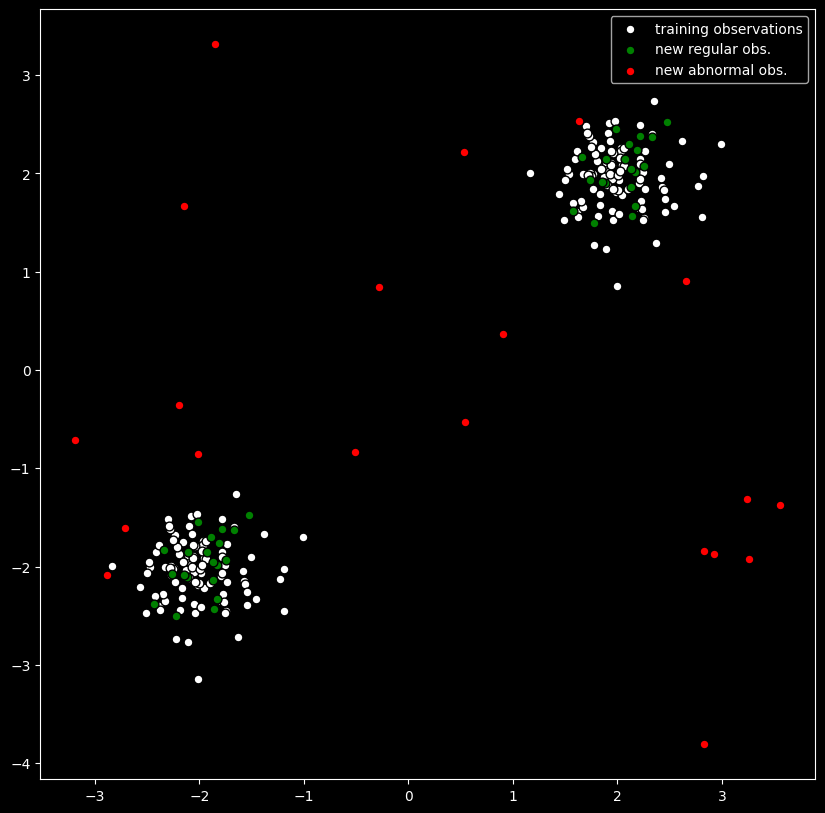

In [ ]:
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])

plt.rcParams['figure.figsize'] = [10, 10];
p1 = plt.scatter(X_train.x1, X_train.x2, c='white', s=20*2, edgecolor='k', label='training observations');

# ▶ Test set, 정상 Sample 
p2 = plt.scatter(X_test.x1, X_test.x2, c='green', s=20*2, edgecolor='k', label='new regular obs.');

# ▶ Outlier set
p3 = plt.scatter(X_outliers.x1, X_outliers.x2, c='red', s=20*2, edgecolor='k', label='new abnormal obs.');

plt.legend();
# plt.gcf().set_size_inches(5, 5)

In [ ]:
# ▶ 모델 학습 및 평가
# ▶ Kernel : Hyper plane의 종류 (Linear vs rbf)
# ▶ gamma : Support vector와의 거리, 크면 가까이 있는 데이터, 작으면 먼 데이터 참조
# ▶ nu : Hyper plane 밖에 있는(abnormal) data의 비율

clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

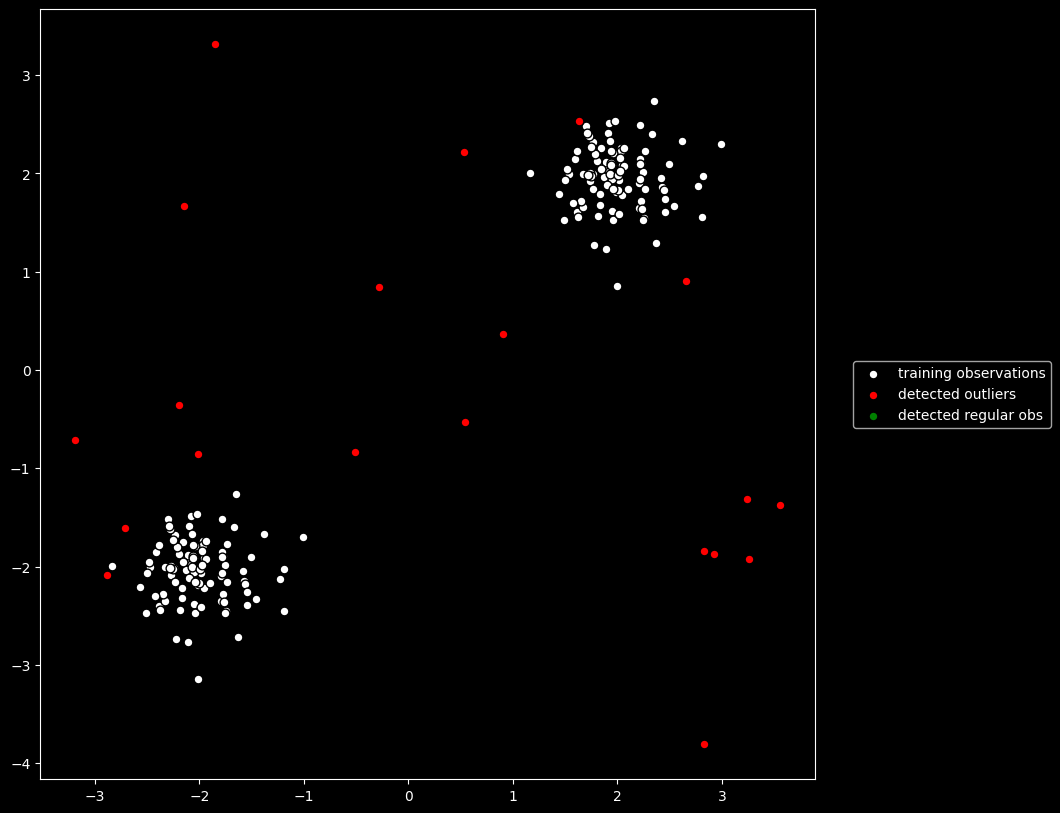

In [ ]:
# ▶ Outlier Label 할당
X_outliers = X_outliers.assign(y = y_pred_outliers)

p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=20*2, edgecolor='k', label="training observations")

p2 = plt.scatter(X_outliers.loc[X_outliers.y == -1, ['x1']], 
                 X_outliers.loc[X_outliers.y == -1, ['x2']], 
                 c='red', s=20*2, edgecolor='k', label="detected outliers")

p3 = plt.scatter(X_outliers.loc[X_outliers.y == 1, ['x1']], 
                 X_outliers.loc[X_outliers.y == 1, ['x2']], 
                 c='green', s=20*2, edgecolor='k', label="detected regular obs")

plt.legend(loc='center left', bbox_to_anchor=(1.04,0.5));
plt.gcf().set_size_inches(10, 10)

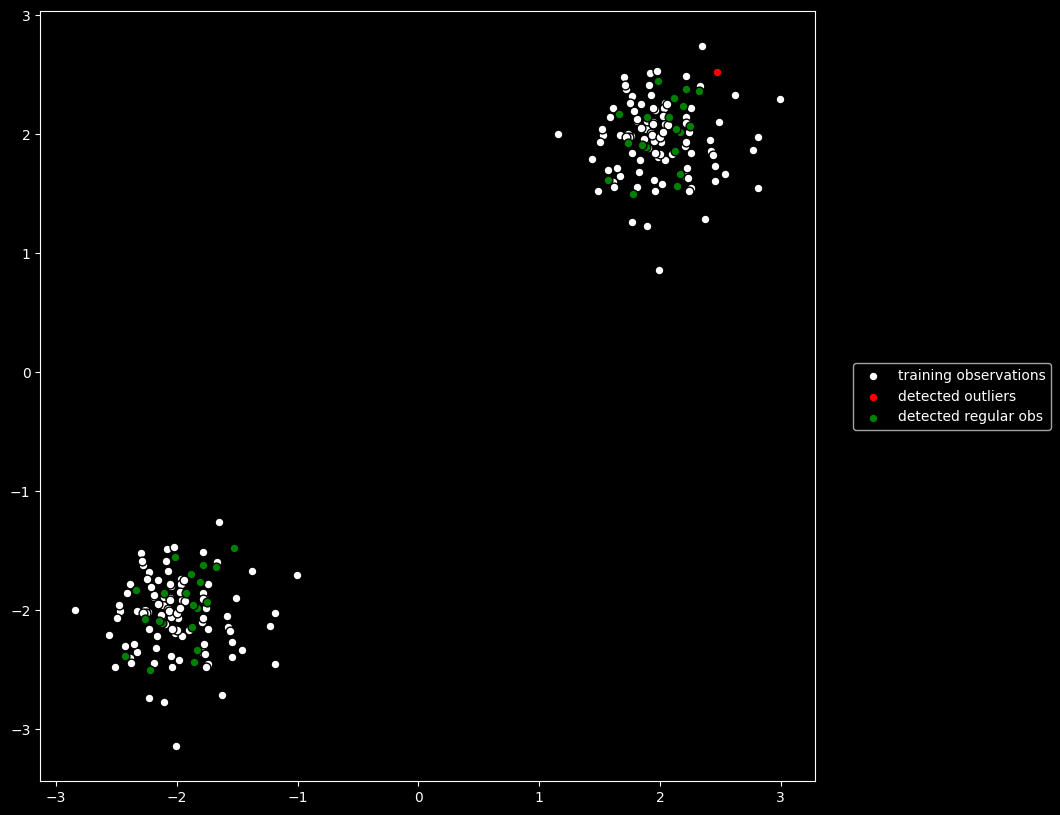

In [ ]:
# ▶ Test set 검증
X_test = X_test.assign(y = y_pred_test)

p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=20*2, edgecolor='k', label="training observations") # 학습 데이터

p2 = plt.scatter(X_test.loc[X_test.y == -1, ['x1']], 
                 X_test.loc[X_test.y == -1, ['x2']], 
                 c='red', s=20*2, edgecolor='k', label="detected outliers") # test 데이터셋에서 정상으로 판단한 것

p3 = plt.scatter(X_test.loc[X_test.y == 1, ['x1']], 
                 X_test.loc[X_test.y == 1, ['x2']], 
                 c='green', s=20*2, edgecolor='k', label="detected regular obs") # test 데이터셋에서 이상치로 판단한 것

plt.legend(loc='center left', bbox_to_anchor=(1.04,0.5));
plt.gcf().set_size_inches(10, 10)

In [ ]:
# ▶ 정상 data set을 얼만큼 정상으로 예측하였는지?
print("테스트 데이터셋에서 정확도:", list(y_pred_test).count(1)/y_pred_test.shape[0])

# ▶ Outlier data set을 얼마나 Outlier로 예측하였는지?
print("이상치 데이터셋에서 정확도:", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])

테스트 데이터셋에서 정확도: 0.975
이상치 데이터셋에서 정확도: 1.0
